# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [371]:
import pandas as pd

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [372]:
data=pd.read_csv('/content/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [373]:
data.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [374]:
data.info() # tAccident_severity            12316 non-null  object
#is obejet it mean that it is categrical and we must make a model predect categury

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [375]:
data['Accident_severity'].value_counts()# the category

,count
Accident_severity,
Slight Injury,10415
Serious Injury,1743
Fatal injury,158


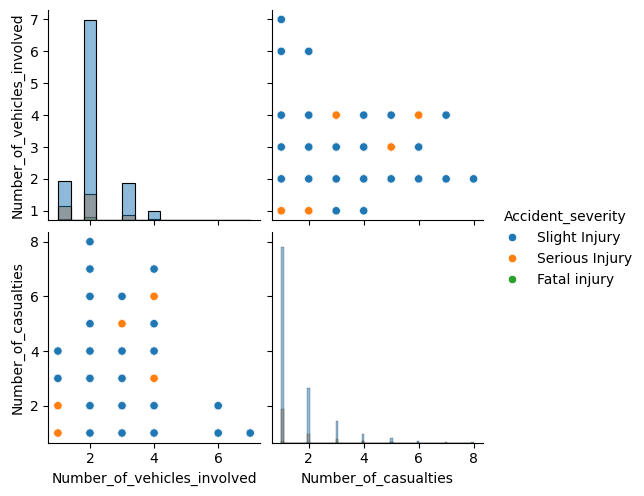

In [376]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.pairplot(data)
#sns.pairplot(data,height=2.5)
sns.pairplot(data,hue='Accident_severity',diag_kind="hist")
#here we observe the Accident Severity relation with some feature

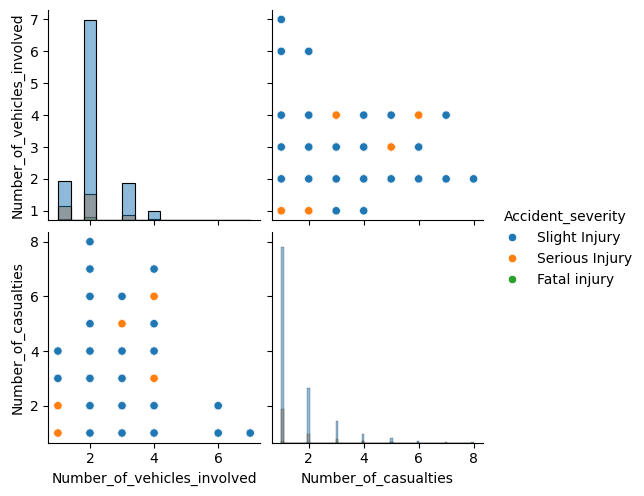

In [377]:
sns.pairplot(data,hue='Accident_severity',diag_kind="hist")
# i decid to

i decide to take some of feature to predict the Accident severity

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [378]:
##here we divide the data to make the appropriate changes depend on the data type
numeric_data=data.select_dtypes(include=['int64'])
categorical_data=data.select_dtypes(include=['object'])
print(categorical_data.head())
print(numeric_data.value_counts())

       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

In [379]:
#Handling Missing Values:
categorical_data.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [380]:
for column in categorical_data.select_dtypes(include=['object']):
    mode_value = categorical_data[column].mode()[0]
    categorical_data[column] = categorical_data[column].fillna(mode_value)

In [381]:
#see the object null and dell with it with the mean and here i represent the table before and after
print(categorical_data.select_dtypes(include=['object']).isna().sum())
for column in categorical_data.columns:
    mode_value = categorical_data[column].mode()[0]
    categorical_data[column].replace('na',categorical_data[column].mode()[0])

print(categorical_data.select_dtypes(include=['object']).isna().sum())


Time                       0
Day_of_week                0
Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Type_of_vehicle            0
Owner_of_vehicle           0
Service_year_of_vehicle    0
Defect_of_vehicle          0
Area_accident_occured      0
Lanes_or_Medians           0
Road_allignment            0
Types_of_Junction          0
Road_surface_type          0
Road_surface_conditions    0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Vehicle_movement           0
Casualty_class             0
Sex_of_casualty            0
Age_band_of_casualty       0
Casualty_severity          0
Work_of_casuality          0
Fitness_of_casuality       0
Pedestrian_movement        0
Cause_of_accident          0
Accident_severity          0
dtype: int64
Time                       0
Day_of_week                0
Age_band_of_driver         0
Sex_of_driver              0
E

In [382]:
print(numeric_data.isna().sum())
numeric_data.describe()
# no null value in numeric_data

Number_of_vehicles_involved    0
Number_of_casualties           0
dtype: int64


,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [383]:
print(categorical_data.value_counts())

Time      Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level   Vehicle_driver_relation  Driving_experience  Type_of_vehicle       Owner_of_vehicle  Service_year_of_vehicle  Defect_of_vehicle  Area_accident_occured  Lanes_or_Medians                                  Road_allignment                            Types_of_Junction  Road_surface_type  Road_surface_conditions  Light_conditions       Weather_conditions  Type_of_collision               Vehicle_movement  Casualty_class   Sex_of_casualty  Age_band_of_casualty  Casualty_severity  Work_of_casuality  Fitness_of_casuality  Pedestrian_movement  Cause_of_accident           Accident_severity
0:01:00   Friday       18-30               Male           Junior high school  Employee                 2-5yr               Other                 Governmental      Unknown                  No defect          Residential areas      other                                             Tangent road with flat terrain             Crossing       

In [384]:
final_data.head()

,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Sex_of_driver_Female,Sex_of_driver_Male,Sex_of_driver_Unknown,...,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Accident_severity_Fatal injury,Accident_severity_Serious Injury,Accident_severity_Slight Injury,Number_of_vehicles_involved,Number_of_casualties
0,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,2,2
1,False,True,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,True,2,2
2,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,2,2
3,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,2,2
4,False,False,False,True,False,False,False,False,True,False,...,False,True,False,False,False,False,False,True,2,2


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

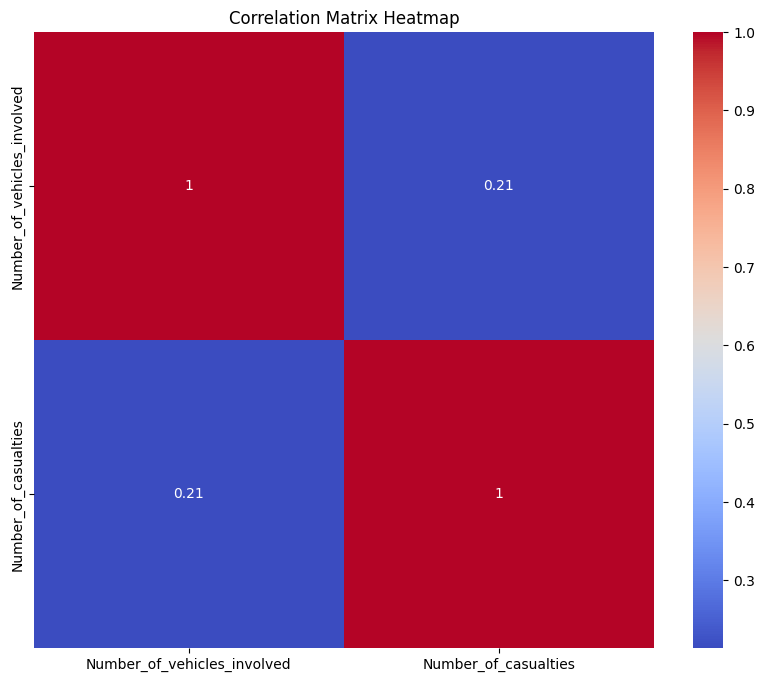

In [385]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

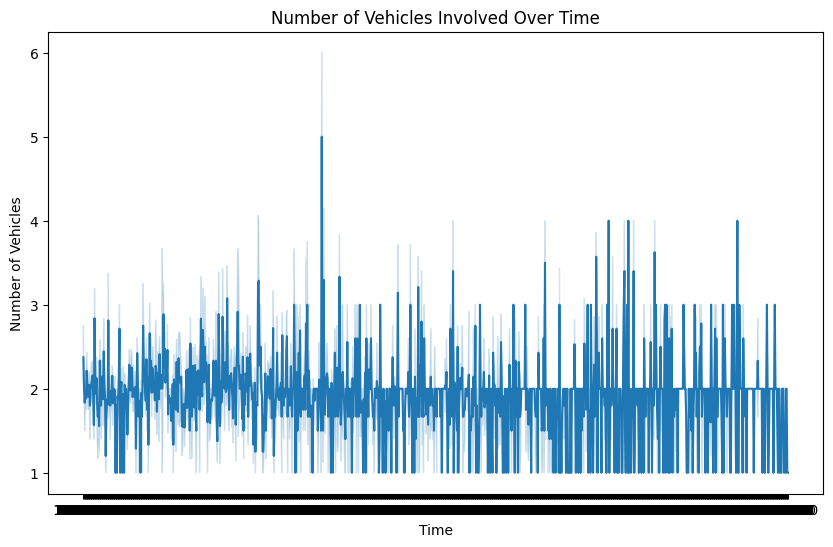

In [386]:
# Example: Line plot of a numeric feature over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=data['Time'], y=numeric_data['Number_of_vehicles_involved'])
plt.title("Number of Vehicles Involved Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Vehicles")
plt.show()

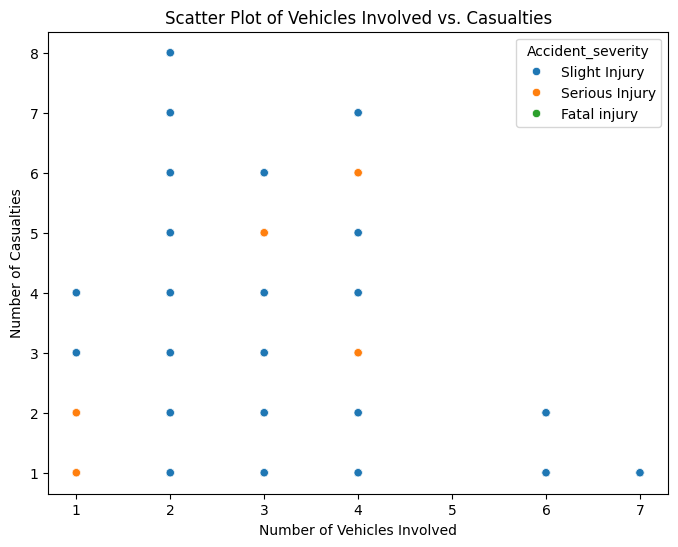

In [387]:
# Example: Scatter plot of two numeric features Again
plt.figure(figsize=(8, 6))
sns.scatterplot(x=numeric_data['Number_of_vehicles_involved'], y=numeric_data['Number_of_casualties'], hue=data['Accident_severity'])
plt.title("Scatter Plot of Vehicles Involved vs. Casualties")
plt.xlabel("Number of Vehicles Involved")
plt.ylabel("Number of Casualties")
plt.show()

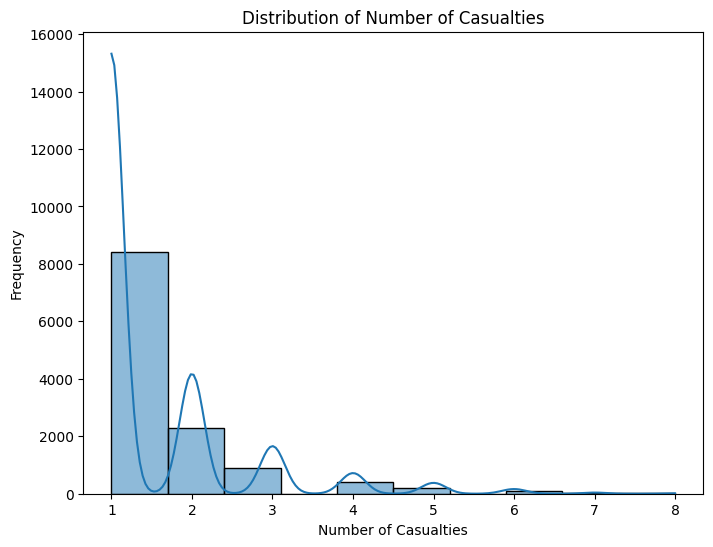

In [388]:
# Example: Histogram of a numeric feature
plt.figure(figsize=(8, 6))
sns.histplot(numeric_data['Number_of_casualties'], bins=10, kde=True)
plt.title("Distribution of Number of Casualties")
plt.xlabel("Number of Casualties")
plt.ylabel("Frequency")
plt.show()
#here we see that the high number of injers is not that much

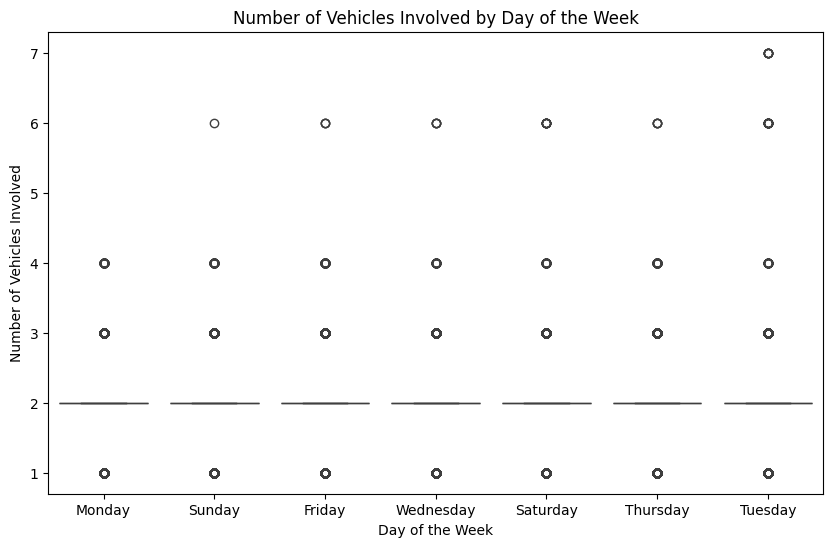

In [389]:
# Example: Boxplot of a numeric feature grouped by a categorical feature
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Day_of_week'], y=numeric_data['Number_of_vehicles_involved'])
plt.title("Number of Vehicles Involved by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Vehicles Involved")
plt.show()
#Tuesday is most day in traffic

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

<h3> After absurving featur i will drop some with multyple resunse <h3>

<h2> splet the data befor scaling and encoding

In [395]:
print(categorical_data.shape[1])
categorical_data=categorical_data.drop(['Time', 'Age_band_of_driver', 'Owner_of_vehicle', 'Age_band_of_casualty'], axis=1)
print("after rshape",categorical_data.shape[1])
y=categorical_data['Accident_severity']

categorical_data = categorical_data.drop(['Accident_severity'], axis=1)


29
after rshape 25


In [396]:
y.head()

,Accident_severity
0,Slight Injury
1,Slight Injury
2,Serious Injury
3,Slight Injury
4,Slight Injury


In [405]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y.

array([2, 2, 1, ..., 1, 2, 2])

In [397]:

#encode and scali
# One-hot encode the categorical data with prefix
encoded_categorical_data = pd.get_dummies(categorical_data, prefix=categorical_data.columns)

# Concatenate the numeric data and the encoded categorical data
X= pd.concat([encoded_categorical_data , numeric_data], axis=1)
X.head()

,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Sex_of_driver_Female,Sex_of_driver_Male,Sex_of_driver_Unknown,...,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Number_of_vehicles_involved,Number_of_casualties
0,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,2,2
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,2,2
2,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,2,2
3,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,2,2
4,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,2,2


In [408]:
print(X.shape)

print(y.shape)

(12316, 191)
(12316,)


In [409]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [412]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
steps = [
    ('scaler', StandardScaler()),  # Transformer step
    ('regressor', LinearRegression())  # Estimator step
]

# Create the pipeline
pipeline = Pipeline(steps)

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
linear_y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.17435626481316083


#### Decision Tree Classifier

In [416]:
from sklearn.tree import DecisionTreeClassifier

steps = [
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier())
]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
tree_y_pred = pipeline.predict(X_test)

# Evaluate the model (example with mean squared error)
mse = mean_squared_error(y_test, tree_y_pred)
print(f"Mean Squared Error for Decision Tree: {mse}")

Mean Squared Error for Decision Tree: 0.31231393775372124


#### Support Vector Machine (SVM)

In [414]:
from sklearn.svm import SVC

steps = [
    ('scaler', StandardScaler()),
    ('svm', SVC())
]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
svm_y_pred = pipeline.predict(X_test)

# Evaluate the model (example with mean squared error)
mse = mean_squared_error(y_test, svm_y_pred)
print(f"Mean Squared Error for SVM: {mse}")

Mean Squared Error for SVM: 0.20568335588633288




```
# This is formatted as code
```

#### K-Neighbors Classifier

In [418]:
from sklearn.neighbors import KNeighborsClassifier

steps = [
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
knn_y_pred = pipeline.predict(X_test)

# Evaluate the model (example with mean squared error)
mse = mean_squared_error(y_test, knn_y_pred)
print(f"Mean Squared Error for KNN: {mse}")

Mean Squared Error for KNN: 0.2175913396481732


## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

<h2>Logestic model

In [413]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_true=y_test,y_pred=linear_y_pred)

mse = mean_squared_error(y_true=y_test,y_pred=linear_y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=linear_y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.2831168086443421
MSE: 0.17435626481316083
RMSE: 0.41755989368372154


In [419]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_true=y_test,y_pred=linear_y_pred)

mse = mean_squared_error(y_true=y_test,y_pred=tree_y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=tree_y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.2831168086443421
MSE: 0.31231393775372124
RMSE: 0.5588505504638259


In [420]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_true=y_test,y_pred=svm_y_pred)

mse = mean_squared_error(y_true=y_test,y_pred=svm_y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=svm_y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.17753721244925574
MSE: 0.20568335588633288
RMSE: 0.45352326939897236


In [421]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_true=y_test,y_pred=knn_y_pred)

mse = mean_squared_error(y_true=y_test,y_pred=knn_y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=knn_y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.18998646820027063
MSE: 0.2175913396481732
RMSE: 0.46646686875722826


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- `**Evaluate Trade-offs**:` Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

<h4>Compare Metrics: in model evaluation i comper with all model and findout that the most convenin model for the problim and the featur i choses is diffrent with the way i calculate the error for exampl the best model in MAE is SVM And in MSE is th logistic regression model but in avarege the svm Is the best (I Need more Calculation)

<h3>Evaluate Trade-offs: i justfaid previsly that if i need to choses model i will choses the leatst in error (SVM) and the Accurce of the model privent that SVM is the fit one
<h3> SVM Accuracy: 0.8365358592692829
Precision: 0.6997922438433973
Recall: 0.8365358592692829
<h3>KNN Accuracy: 0.8238159675236807
Precision: 0.7354734359370295
Recall: 0.8238159675236807

**Evaluate Trade-offs**: the data have Time And in my casw my lapil will not be diffrint and not depend on time maybe the Strigth off the accident  depend on some peroiord of time like night or day but the tybe is not

-Svm Models is more convenient for multi class problem according to personal previse useg for me

### Answer Here:

## Confise *Matrix*:


In [426]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming y_test (true labels) and y_pred (predicted labels) for a classification model
accuracy = accuracy_score(y_test, svm_y_pred)
precision = precision_score(y_test, svm_y_pred, average='weighted')  # Adjust 'average' parameter as needed
recall = recall_score(y_test, svm_y_pred, average='weighted')  # Adjust 'average' parameter as needed

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8365358592692829
Precision: 0.6997922438433973
Recall: 0.8365358592692829


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [427]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming y_test (true labels) and y_pred (predicted labels) for a classification model
accuracy = accuracy_score(y_test, tree_y_pred)
precision = precision_score(y_test, tree_y_pred, average='weighted')  # Adjust 'average' parameter as needed
recall = recall_score(y_test, tree_y_pred, average='weighted')  # Adjust 'average' parameter as needed

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.747767253044655
Precision: 0.7474730682037853
Recall: 0.747767253044655


In [428]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming y_test (true labels) and y_pred (predicted labels) for a classification model
accuracy = accuracy_score(y_test, knn_y_pred)
precision = precision_score(y_test, knn_y_pred, average='weighted')  # Adjust 'average' parameter as needed
recall = recall_score(y_test, knn_y_pred, average='weighted')  # Adjust 'average' parameter as needed

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8238159675236807
Precision: 0.7354734359370295
Recall: 0.8238159675236807
